In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import json
import warnings
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from mpl_toolkits import mplot3d

### Dara Preprocessing

In [2]:
movies_df = pd.read_csv("ml-1m/movies.dat",sep="::",header=None,encoding='latin-1')
movies_df.columns = ["MovieID","Title","Genres"]

In [3]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
'''
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western
'''

"\n- Genres are pipe-separated and are selected from the following genres:\n\n\t* Action\n\t* Adventure\n\t* Animation\n\t* Children's\n\t* Comedy\n\t* Crime\n\t* Documentary\n\t* Drama\n\t* Fantasy\n\t* Film-Noir\n\t* Horror\n\t* Musical\n\t* Mystery\n\t* Romance\n\t* Sci-Fi\n\t* Thriller\n\t* War\n\t* Western\n"

In [5]:
users_df = pd.read_csv("ml-1m/users.dat",sep="::",header=None,encoding='latin-1')
users_df.columns = ["UserID","Gender","Age","Occupation","Zip-code"]

In [7]:
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [8]:
'''
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"
'''

'\n- Gender is denoted by a "M" for male and "F" for female\n- Age is chosen from the following ranges:\n\n\t*  1:  "Under 18"\n\t* 18:  "18-24"\n\t* 25:  "25-34"\n\t* 35:  "35-44"\n\t* 45:  "45-49"\n\t* 50:  "50-55"\n\t* 56:  "56+"\n\n- Occupation is chosen from the following choices:\n\n\t*  0:  "other" or not specified\n\t*  1:  "academic/educator"\n\t*  2:  "artist"\n\t*  3:  "clerical/admin"\n\t*  4:  "college/grad student"\n\t*  5:  "customer service"\n\t*  6:  "doctor/health care"\n\t*  7:  "executive/managerial"\n\t*  8:  "farmer"\n\t*  9:  "homemaker"\n\t* 10:  "K-12 student"\n\t* 11:  "lawyer"\n\t* 12:  "programmer"\n\t* 13:  "retired"\n\t* 14:  "sales/marketing"\n\t* 15:  "scientist"\n\t* 16:  "self-employed"\n\t* 17:  "technician/engineer"\n\t* 18:  "tradesman/craftsman"\n\t* 19:  "unemployed"\n\t* 20:  "writer"\n'

In [9]:
ratings_df = pd.read_csv("ml-1m/ratings.dat",sep="::",header=None,encoding='latin-1')
ratings_df.columns = ["UserID","MovieID","Rating","Timestamp"]

In [10]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
'''
- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings
'''

In [17]:
users_df.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [18]:
ratings_df.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

In [19]:
movies_df.dtypes

MovieID     int64
Title      object
Genres     object
dtype: object

In [11]:
data = pd.merge(pd.merge(ratings_df, users_df), movies_df)

In [12]:
data['Genres'] = data['Genres'].str.split('|')

In [22]:
data["movie_year"] = 0
data["movie_year"] = data.Title.apply(lambda x: int(x.split("(")[-1].split(")")[0]))
data["Title"] = data.Title.apply(lambda x: x.split("(")[0])

In [23]:
data.movie_year.value_counts()

1999    86833
1998    68226
1997    65402
1995    60754
1996    59382
        ...  
1919       45
1929       43
1928       27
1920       24
1923       17
Name: movie_year, Length: 81, dtype: int64

In [24]:
data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,movie_year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,[Drama],1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,[Drama],1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,[Drama],1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,[Drama],1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations,[Documentary],1998
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels,[Drama],1998
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys,[Drama],1999
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian,"[Comedy, Drama, Western]",1973


### EDA

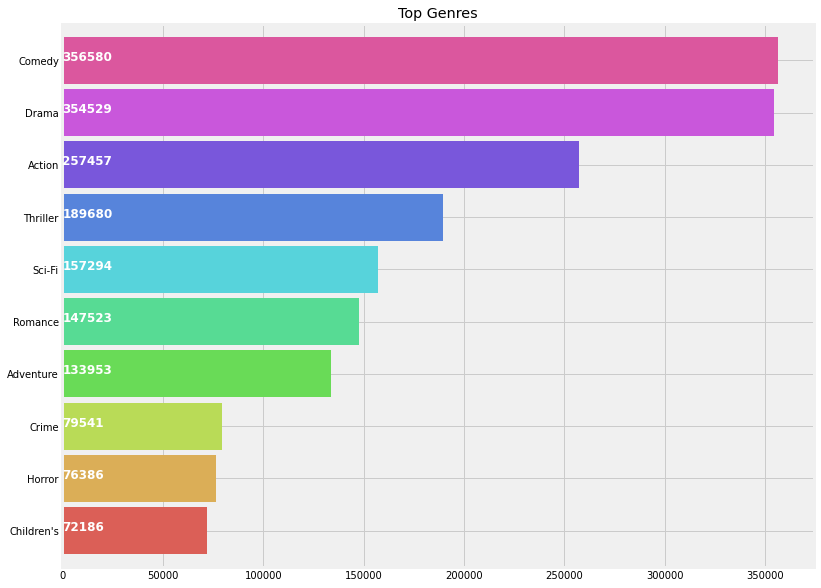

In [25]:
plt.subplots(figsize=(12,10))
list1 = []
for i in data['Genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [26]:
#Drama appears to be the most popular genre followed by Comedy.

In [44]:
genreList = []
for index, row in data.iterrows():
    genres = row["Genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a unique l;ist

['Drama',
 'Animation',
 "Children's",
 'Musical',
 'Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi']

In [45]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
data['genres_bin'] = data['Genres'].apply(lambda x: binary(x))
data['genres_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [27]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

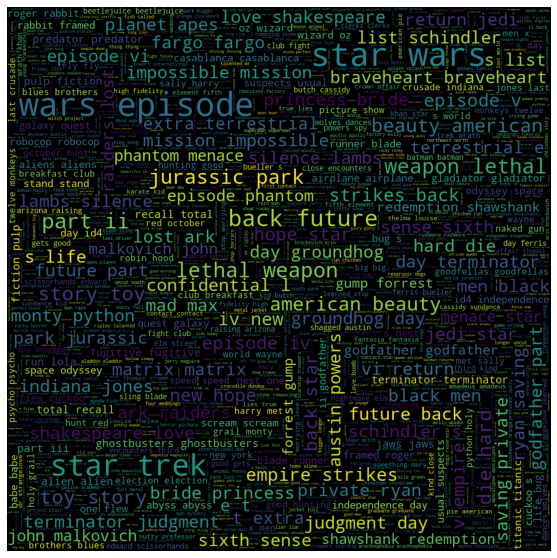

In [28]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=data['Title'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [29]:
#Above is a wordcloud showing the major keywords or tags used for describing the movies.

In [46]:
words_list = []
for index, row in data.iterrows():
    genres = row["Genres"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [47]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList


In [48]:
data['words_bin'] = data['Genres'].apply(lambda x: binary(x))

In [73]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = data.iloc[movieId1]
    b = data.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    genreDistance = spatial.distance.cosine(genresA, genresB)

    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance + wordsDistance


In [74]:
Similarity(0,1000207) #checking similarity between any 2 random movies

0.8452994616207485

### Calculate mean movie ratings for each film by gender using the pivot table method

In [78]:
mean_ratings = data.pivot_table('Rating', index='Title',columns='Gender', aggfunc='mean')

In [79]:
mean_ratings

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [80]:
'''Filter movies with low rating (less than 250).

group data by title and get size()
extract list of titles with ratings by title >= 250
use list to select mean ratings
'''

'Filter movies with low rating (less than 250).\n\ngroup data by title and get size()\nextract list of titles with ratings by title >= 250\nuse list to select mean ratings\n'

In [82]:
ratings_by_title = data.groupby('Title').size()
ratings_by_title[:10]

Title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [83]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='Title')

In [84]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

Gender,F,M
Title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [85]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

Gender,F,M
Title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [86]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

Gender,F,M
Title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


### Measuring Rating Disagreement

In [88]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [89]:
mean_ratings.sort_values(by='diff').head(10)

Gender,F,M,diff
Title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [90]:
mean_ratings.sort_values(by='diff', ascending=False).head(10)

Gender,F,M,diff
Title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [91]:
'''Finding movies with highest disagreement of viewers independent of gender:

calculate variance and standard deviation of the ratings
filter titles with ratings count equal or higher 250 (list active_titles from earlier)
sort movies in descending order'''

'Finding movies with highest disagreement of viewers independent of gender:\n\ncalculate variance and standard deviation of the ratings\nfilter titles with ratings count equal or higher 250 (list active_titles from earlier)\nsort movies in descending order'

In [93]:
rating_std_by_title = data.groupby('Title')['Rating'].std()
rating_std_by_title[:5]

Title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: Rating, dtype: float64

In [94]:
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

Title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: Rating, dtype: float64

In [95]:
ratings_df.Rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

#users: 6040
#movies: 3706
#ratings %: 4.468362562231285
#users: 6040
#movies: 3706
#ratings %: 4.468362562231285


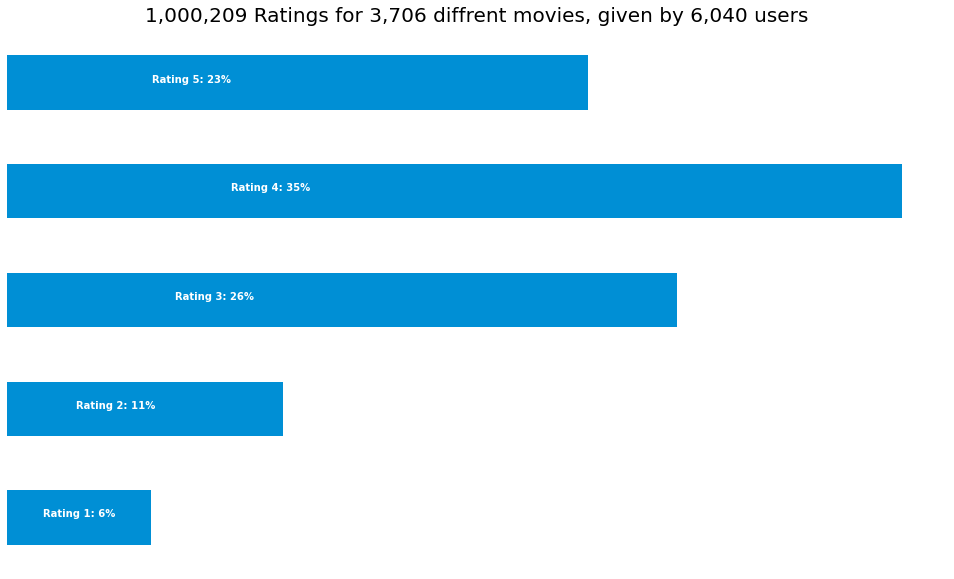

In [98]:
print("#users: "+ str(ratings_df.UserID.nunique()))
print("#movies: "+ str(ratings_df.MovieID.nunique()))
print("#ratings %: "+ str(ratings_df.shape[0]/(ratings_df.UserID.nunique()*ratings_df.MovieID.nunique())*100))


p = ratings_df.groupby('Rating')['Rating'].agg(['count'])

movie_count = ratings_df["MovieID"].nunique()

user_count = ratings_df['UserID'].nunique()

rating_count = ratings_df.shape[0]

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('{:,} Ratings for {:,} diffrent movies, given by {:,} users'.format(rating_count, movie_count, user_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
print("#users: "+ str(ratings_df.UserID.nunique()))
print("#movies: "+ str(ratings_df.MovieID.nunique()))
print("#ratings %: "+ str(ratings_df.shape[0]/(ratings_df.UserID.nunique()*ratings_df.MovieID.nunique())*100))

In [99]:
user_rating_count = ratings_df.groupby('UserID')['UserID'].agg(['count'])
top_raters = user_rating_count.nlargest(5,'count')
worst_raters = user_rating_count.nsmallest(5,'count')
print("Top movie raters")
print(top_raters)
print()
print("Worst movie raters")
print(worst_raters)

Top movie raters
        count
UserID       
4169     2314
1680     1850
4277     1743
1941     1595
1181     1521

Worst movie raters
        count
UserID       
98         20
160        20
217        20
250        20
311        20


In [100]:
#Now we will pivot ratings_df to get userXmovie matrix format. We will also de-mean the data (normalize by each users mean) 
#and convert it from a dataframe to a numpy array.

In [101]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#We can see how much the matrix is sparse, where most of the values in the matrix are zeros.

In [ ]:
#create test data by sampling (and removing) 500 ratings from our matrixcreate test data by sampling (and removing) 500 ratings from our matrix

In [105]:
rated_indices = np.argwhere(R_demeaned>0)
random.seed(123)
test_set = random.sample(list(rated_indices),500)

print("1st index is "+str(test_set[0])+" and its rating is "+str(R_demeaned[test_set[0][0],test_set[0][1]]))

test_ratings = []
for i in range(len(test_set)):
    test_ratings.append(R_demeaned[test_set[i][0],test_set[i][1]])
    R_demeaned[test_set[i][0],test_set[i][1]]=0

print("1st index is "+str(test_set[0])+" and its rating is "+str(R_demeaned[test_set[0][0],test_set[0][1]]))

1st index is [ 359 1142] and its rating is 2.934160820291419
1st index is [ 359 1142] and its rating is 0.0


In [106]:
##Singular Value Decomposition

In [107]:
def printRMSEGraph(kArr, RMSEArr):
    plt.plot(kArr, RMSEArr)
    plt.xlabel("Num of latent features")
    plt.ylabel("RMSE")
    
def svdPrediction(kArr):
    rmses = []
    for k in kArr:
        U, sigma, Vt = svds(R_demeaned, k = k)
        sigma = np.diag(sigma)
        predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
        preds_df = pd.DataFrame(predicted_ratings, columns = R_df.columns)
        pred_set = [predicted_ratings[x[0],x[1]] for x in test_set]

        res_df = pd.DataFrame()
        res_df["act"] = test_ratings
        res_df["pred"] = pred_set

        rmse = np.sqrt(mean_squared_error(res_df["act"].values, res_df["pred"].values))
        rmses.append(rmse)
        print(f"k: {k}; RMSE: {rmse}")
    return rmses

k: 1; RMSE: 2.653635621913554
k: 2; RMSE: 2.5522821021283333
k: 4; RMSE: 2.4741421835820248
k: 8; RMSE: 2.3508603857948795
k: 16; RMSE: 2.2631490198113204
k: 32; RMSE: 2.2026840146873563
k: 64; RMSE: 2.1975300246585854
k: 128; RMSE: 2.323948460271941
k: 256; RMSE: 2.5821940954472
k: 512; RMSE: 2.843540695449309
k: 1024; RMSE: 3.0388828732481215


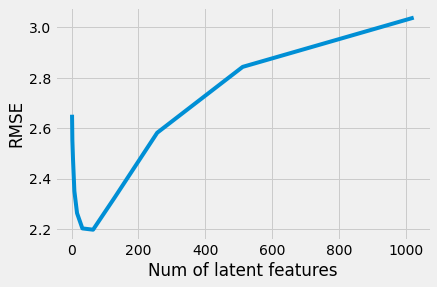

In [108]:
kArr = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
rmses = svdPrediction(kArr)
printRMSEGraph(kArr, rmses)

In [109]:
#We can see that the best value is around 64 latent features so lets dig inside this area

k: 40; RMSE: 2.1963202818608325
k: 45; RMSE: 2.203790658107742
k: 50; RMSE: 2.191739886222759
k: 55; RMSE: 2.183847842305158
k: 60; RMSE: 2.186511929347558
k: 65; RMSE: 2.2004742303916367
k: 70; RMSE: 2.2164192195148713
k: 75; RMSE: 2.226003983863667
k: 80; RMSE: 2.216446741672342
k: 85; RMSE: 2.2298388023474525
k: 90; RMSE: 2.238286878204129


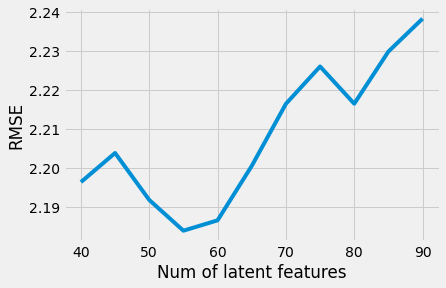

In [110]:
kArr_2 = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
rmses = svdPrediction(kArr_2)
printRMSEGraph(kArr_2, rmses)

In [111]:
#So with SVD we getting RMSE of ~2.3.
#Lets try to get better results using the SVT algorithm

In [112]:
## Singular value thresholding

In [113]:
def svtPrediction(tau, delta, epsilon, max_iterations):
    Y = np.zeros_like(R_demeaned)
    mask = np.round(R_demeaned > 0).astype(int)
    print("==========================================================")
    print(f"Parameters: tau = {tau}, delta = {delta}")

    for i in range(max_iterations):
        U, S, V = svds(Y, k=50)
        S = np.maximum(S - tau, 0)
        X = np.linalg.multi_dot([U, np.diag(S), V])
        Y = Y + delta * mask * (R_demeaned - X)

        error = np.linalg.norm(mask * (X - R_demeaned)) / np.linalg.norm(mask * R_demeaned)
        print(f"Iteration number: {i + 1}; Relative error: {error}")
            
        if error < epsilon:
            break
            
    pred_set = [X[x[0],x[1]] for x in test_set]    
        
    res_df = pd.DataFrame()
    res_df["act"] = test_ratings
    res_df["pred"] = pred_set
    
    differences = abs(res_df["act"] - res_df["pred"])
    print(f"The smallest prediction diffrence is {differences.min()} and the biggest is {differences.max()}")

    rmse = np.sqrt(mean_squared_error(res_df["act"].values, res_df["pred"].values))
    print(f"RMSE: {rmse}")
    
    return rmse

In [114]:
taus = [0.5, 1, 1.5, 2]
deltas = [0.5, 1, 1.5, 2]
results = pd.DataFrame(columns=["delta", "tau", "rmse"])

for delta in deltas:
    for tau in taus:
        rmse= svtPrediction(tau, delta, 0.01, 5)
        results = results.append(pd.DataFrame([[delta, tau, rmse]], columns=["delta", "tau", "rmse"]))

Parameters: tau = 0.5, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.7768302238550735
Iteration number: 3; Relative error: 0.6490368784867055
Iteration number: 4; Relative error: 0.571064997007694
Iteration number: 5; Relative error: 0.5194060206886306
The smallest prediction diffrence is 0.0020455576226623418 and the biggest is 6.157096128924474
RMSE: 1.997813592959315
Parameters: tau = 1, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.7772742174953495
Iteration number: 3; Relative error: 0.6492962000476661
Iteration number: 4; Relative error: 0.5712092035850002
Iteration number: 5; Relative error: 0.5195271662612573
The smallest prediction diffrence is 0.002700708933649487 and the biggest is 6.140527290744595
RMSE: 1.9979251078321687
Parameters: tau = 1.5, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.777

In [115]:
def svtPredictionWithCap(tau, delta, epsilon, max_iterations):
    Y = np.zeros_like(R_demeaned)
    mask = np.round(R_demeaned > 0).astype(int)
    print("==========================================================")
    print(f"Parameters: tau = {tau}, delta = {delta}")

    for i in range(max_iterations):
        U, S, V = svds(Y, k=50)
        S = np.maximum(S - tau, 0)
        X = np.linalg.multi_dot([U, np.diag(S), V])
        Y = Y + delta * mask * (R_demeaned - X)

        error = np.linalg.norm(mask * (X - R_demeaned)) / np.linalg.norm(mask * R_demeaned)
        print(f"Iteration number: {i + 1}; Relative error: {error}")
            
        if error < epsilon:
            break
            
    pred_set = [X[x[0],x[1]] for x in test_set]    
        
    res_df = pd.DataFrame()
    res_df["act"] = test_ratings
    res_df["pred"] = pred_set
    res_df["pred"] = np.where(res_df["pred"] > 5, 5, res_df["pred"])
    res_df["pred"] = np.where(res_df["pred"] < 1, 1, res_df["pred"])

    
    differences = abs(res_df["act"] - res_df["pred"])
    print(f"The smallest prediction diffrence is {differences.min()} and the biggest is {differences.max()}")

    rmse = np.sqrt(mean_squared_error(res_df["act"].values, res_df["pred"].values))
    print(f"RMSE: {rmse}")
    return rmse

In [116]:
taus = [0.5, 1, 1.5, 2]
deltas = [0.5, 1, 1.5, 2]
results = pd.DataFrame(columns=["delta", "tau", "rmse"])
bestResult = [0.0, 0.0, float("inf")]

for delta in deltas:
    for tau in taus:
        rmse= svtPredictionWithCap(tau, delta, 0.01, 5)
        if rmse < bestResult[2]:
            bestResult = [delta, tau, rmse]
        results = results.append(pd.DataFrame([[delta, tau, rmse]], columns=["delta", "tau", "rmse"]))

Parameters: tau = 0.5, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.7768302238550735
Iteration number: 3; Relative error: 0.6490368784867058
Iteration number: 4; Relative error: 0.5710649970076939
Iteration number: 5; Relative error: 0.5194060206886305
The smallest prediction diffrence is 0.0020455576227313976 and the biggest is 3.9635725849973014
RMSE: 1.8310813450791297
Parameters: tau = 1, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.7772742174953496
Iteration number: 3; Relative error: 0.6492962000476654
Iteration number: 4; Relative error: 0.5712092035850004
Iteration number: 5; Relative error: 0.5195271662612574
The smallest prediction diffrence is 0.0027007089336548162 and the biggest is 3.9703184025903937
RMSE: 1.831291423429167
Parameters: tau = 1.5, delta = 0.5
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0

Best result found for delta: 1.5 tau: 2 and the RMSE: 1.5149977146810283


Text(0.5, 0, 'RMSE')

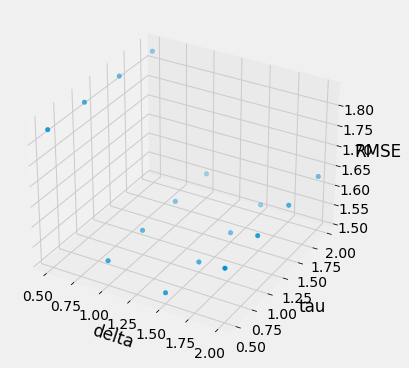

In [117]:
print("==========================================================")
print(f"Best result found for delta: {bestResult[0]} tau: {bestResult[1]} and the RMSE: {bestResult[2]}")
print("==========================================================")
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter(results["delta"], results["tau"], results["rmse"], cmap='viridis', linewidth=0.5)
ax.set_xlabel('delta')
ax.set_ylabel('tau')
ax.set_zlabel('RMSE')

In [ ]:
#Now lets try to run our best result parameters for many iterations to see what is the best RMSE we can get

In [118]:
res = svtPredictionWithCap(bestResult[0], bestResult[1], 0.01, 20)

Parameters: tau = 1.5, delta = 2
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.6387091869285528
Iteration number: 3; Relative error: 0.5738204755474575
Iteration number: 4; Relative error: 0.565606135032324
Iteration number: 5; Relative error: 0.5475488652059357
Iteration number: 6; Relative error: 0.5630844732236324
Iteration number: 7; Relative error: 0.5707943857168343
Iteration number: 8; Relative error: 0.5974428338546686
Iteration number: 9; Relative error: 0.607584752040032
Iteration number: 10; Relative error: 0.6319826480910334
Iteration number: 11; Relative error: 0.6418462170399055
Iteration number: 12; Relative error: 0.6549256290674068
Iteration number: 13; Relative error: 0.6636041986489902
Iteration number: 14; Relative error: 0.6718895945967971
Iteration number: 15; Relative error: 0.679111894441565
Iteration number: 16; Relative error: 0.6858362552294941
Iteration number: 17; Relative error: 0.6885406352433394
Iteration 

In [119]:
'''We can see that even though we had more iterations we didn't go better results. Lets try another improve to the algorithm:

Stop the iterations when the norm relative error don't improve
Decrease delta value on the fly'''

"We can see that even though we had more iterations we didn't go better results. Lets try another improve to the algorithm:\n\nStop the iterations when the norm relative error don't improve\nDecrease delta value on the fly"

In [120]:
def svtPredictionWithCapAndDynamicDelta(tau, delta, epsilon, max_iterations):
    Y = np.zeros_like(R_demeaned)
    mask = np.round(R_demeaned > 0).astype(int)
    lastError = float("inf")
    print("==========================================================")
    print(f"Parameters: tau = {tau}, delta = {delta}")

    for i in range(max_iterations):
        if i !=0 and i % 3 == 0:
            delta = delta / 2
            print(f"Delta decrease to: {delta}")
            
        U, S, V = svds(Y, k=50)
        S = np.maximum(S - tau, 0)
        X = np.linalg.multi_dot([U, np.diag(S), V])
        Y = Y + delta * mask * (R_demeaned - X)

        error = np.linalg.norm(mask * (X - R_demeaned)) / np.linalg.norm(mask * R_demeaned)
        print(f"Iteration number: {i + 1}; Relative error: {error}")
            
        if error < epsilon or lastError < error:
            break
            
        lastError = error
            
    pred_set = [X[x[0],x[1]] for x in test_set]    
        
    res_df = pd.DataFrame()
    res_df["act"] = test_ratings
    res_df["pred"] = pred_set
    res_df["pred"] = np.where(res_df["pred"] > 5, 5, res_df["pred"])
    res_df["pred"] = np.where(res_df["pred"] < 1, 1, res_df["pred"])

    
    differences = abs(res_df["act"] - res_df["pred"])
    print(f"The smallest prediction diffrence is {differences.min()} and the biggest is {differences.max()}")

    rmse = np.sqrt(mean_squared_error(res_df["act"].values, res_df["pred"].values))
    print(f"RMSE: {rmse}")
    return rmse

In [121]:
res = svtPredictionWithCapAndDynamicDelta(bestResult[0], bestResult[1], 0.01, 20)

Parameters: tau = 1.5, delta = 2
Iteration number: 1; Relative error: 1.0000000000000022
Iteration number: 2; Relative error: 0.6387091869285528
Iteration number: 3; Relative error: 0.5738204755474573
Delta decrease to: 1.0
Iteration number: 4; Relative error: 0.5656061350323239
Iteration number: 5; Relative error: 0.4262562629859396
Iteration number: 6; Relative error: 0.41719795034331325
Delta decrease to: 0.5
Iteration number: 7; Relative error: 0.4207025096776658
The smallest prediction diffrence is 0.0004502427019503763 and the biggest is 3.9635725849973014
RMSE: 1.4951579062766958


In [122]:
'''In this note book we try to solve the matrix complition problem for sparse matrix. The matrix is userXmovie patrix where each cell is the prediction user[x] gave to movie[y]. Most of the cells are empty(have 0) and our goal is to predict empty cells values. Using this algorithm we can recomend to users each movies they should watch( by recommend them movies they will probably rank with high score). We started with review the data and understand the data set we are facing, Secondly we start to solve the problem with SVD alogirthm using diffrent number of latent features. After simulating the diffrent runs of SVD we saw that the best result we get is around ~2.3 RMSE and we wanted to see if we can get better results using more complex algorithm. The next algorithm we tryed was SVT, again we run it with diffrent parmeters and found out that we can get much better result, root mean square error of ~1.6 RMSE

This exercise of matrix compltion was really intresting and it feels like there is still a lot of room for improvment and algorithms to face this question in the futurs.

For future work it can be intersting to try and combine the matrix complition algorithms we tryed with other algorithm like clustring or k-nn(that base on features and not ratings) to see how much we can improve our results by using the aggregation of diffrent alogorithms.v'''

'In this note book we try to solve the matrix complition problem for sparse matrix. The matrix is userXmovie patrix where each cell is the prediction user[x] gave to movie[y]. Most of the cells are empty(have 0) and our goal is to predict empty cells values. Using this algorithm we can recomend to users each movies they should watch( by recommend them movies they will probably rank with high score). We started with review the data and understand the data set we are facing, Secondly we start to solve the problem with SVD alogirthm using diffrent number of latent features. After simulating the diffrent runs of SVD we saw that the best result we get is around ~2.3 RMSE and we wanted to see if we can get better results using more complex algorithm. The next algorithm we tryed was SVT, again we run it with diffrent parmeters and found out that we can get much better result, root mean square error of ~1.6 RMSE\n\nThis exercise of matrix compltion was really intresting and it feels like there

#### score preedictors

In [ ]:
import operator
total_neighbors = []
def KNN_predict_score(name):
#     name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
#     print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
#         distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
#     print(neighbors)
    sigm = 0
    mae=0
    #print("yo-",sigm)
#     print('\nMovies Recommended based on K-Nearest Neighbors Content based filtering:')
#     for neighbor in neighbors:
#         avgRating = avgRating+movies.iloc[neighbor[0]][2] 
#         mae+= abs(float(new_movie['vote_average'])-float(movies.iloc[neighbor[0]][2]))
#         sigm += pow(float(new_movie['vote_average'])-float(movies.iloc[neighbor[0]][2]),2)
#         print( movies.iloc[neighbor[0]][0])
    
    total_neighbors.extend(neighbors)
    total_neighbors.sort(key=operator.itemgetter(1))
#     print('\n')
#     avgRating = avgRating/K
#     sigm = (sigm/K)**(0.5)
#     mae = mae/K
#     #print(str(sigm).split(" ")[1])
#     print('Root mean squared error for KNN Content Based Filtering =',sigm)
#     print('Mean Absolute Error for KNN Content Based Filtering =',mae)
    #print(type(sigm))
    #print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    #print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [ ]:
#pending later

## Retrival

In [1]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [2]:
# Ratings data.
ratings = tfds.load("movielens/1m-ratings", split="train")
# Features of all the available movies.
movies = tfds.load("movielens/1m-movies", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\hp\tensorflow_datasets\movielens\1m-ratings\0.1.1.incompleteJEYXL1\movielens-train.tfrecord…

Dataset movielens downloaded and prepared to C:\Users\hp\tensorflow_datasets\movielens\1m-ratings\0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\hp\tensorflow_datasets\movielens\1m-movies\0.1.1.incompleteR2PJ30\movielens-train.tfrecord*…

Dataset movielens downloaded and prepared to C:\Users\hp\tensorflow_datasets\movielens\1m-movies\0.1.1. Subsequent calls will reuse this data.


In [3]:
len(ratings)

1000209

In [5]:
for x in ratings.take(1).as_numpy_iterator():
    print(x)

{'bucketized_user_age': 35.0, 'movie_genres': array([0, 7], dtype=int64), 'movie_id': b'3107', 'movie_title': b'Backdraft (1991)', 'timestamp': 977432193, 'user_gender': True, 'user_id': b'130', 'user_occupation_label': 18, 'user_occupation_text': b'technician/engineer', 'user_rating': 5.0, 'user_zip_code': b'50021'}


In [8]:
for x in movies.take(1).as_numpy_iterator():
    print(x)

{'movie_genres': array([5, 7], dtype=int64), 'movie_id': b'1729', 'movie_title': b'Jackie Brown (1997)'}


In [9]:
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
})
movies = movies.map(lambda x: x["movie_title"])

In [12]:
tf.random.set_seed(27)
shuffled = ratings.shuffle(100000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(800000)
test = shuffled.skip(800000).take(200000)

In [14]:
len(train),len(test)

(800000, 200000)

In [15]:
movie_titles = movies.batch(1000)
user_ids = ratings.batch(100000).map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

unique_movie_titles[:10]

array([b'$1,000,000 Duck (1971)', b"'Night Mother (1986)",
       b"'Til There Was You (1997)", b"'burbs, The (1989)",
       b'...And Justice for All (1979)', b'1-900 (1994)',
       b'10 Things I Hate About You (1999)', b'101 Dalmatians (1961)',
       b'101 Dalmatians (1996)', b'12 Angry Men (1957)'], dtype=object)

In [16]:
embedding_dimension = 32

In [17]:
user_model = tf.keras.Sequential([
  tf.keras.layers.StringLookup(
      vocabulary=unique_user_ids, mask_token=None),
  # We add an additional embedding to account for unknown tokens.
  tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
])

In [18]:
movie_model = tf.keras.Sequential([
  tf.keras.layers.StringLookup(
      vocabulary=unique_movie_titles, mask_token=None),
  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
])

In [19]:
metrics = tfrs.metrics.FactorizedTopK(
  candidates=movies.batch(128).map(movie_model)
)

In [20]:
task = tfrs.tasks.Retrieval(
  metrics=metrics
)

In [21]:
class MovielensModel(tfrs.Model):

    def __init__(self, user_model, movie_model):
        super().__init__()
        self.movie_model: tf.keras.Model = movie_model
        self.user_model: tf.keras.Model = user_model
        self.task: tf.keras.layers.Layer = task

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features["user_id"])
        # And pick out the movie features and pass them into the movie model,
        # getting embeddings back.
        positive_movie_embeddings = self.movie_model(features["movie_title"])

        # The task computes the loss and the metrics.
        return self.task(user_embeddings, positive_movie_embeddings)

In [22]:
model = MovielensModel(user_model, movie_model)
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [23]:
cached_train = train.shuffle(100000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [24]:
model.fit(cached_train, epochs=10)

Epoch 1/10
98/98 [==============================] - 381s 4s/step - factorized_top_k/top_1_categorical_accuracy: 6.8625e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0070 - factorized_top_k/top_10_categorical_accuracy: 0.0152 - factorized_top_k/top_50_categorical_accuracy: 0.0741 - factorized_top_k/top_100_categorical_accuracy: 0.1344 - loss: 71354.2357 - regularization_loss: 0.0000e+00 - total_loss: 71354.2357
Epoch 2/10
98/98 [==============================] - 337s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.0013 - factorized_top_k/top_5_categorical_accuracy: 0.0123 - factorized_top_k/top_10_categorical_accuracy: 0.0252 - factorized_top_k/top_50_categorical_accuracy: 0.1081 - factorized_top_k/top_100_categorical_accuracy: 0.1853 - loss: 69139.7801 - regularization_loss: 0.0000e+00 - total_loss: 69139.7801
Epoch 3/10
98/98 [==============================] - 353s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0014 - factorized_top_k/top_5_categorical_accura

In [25]:
model.evaluate(cached_test, return_dict=True)

49/49 [==============================] - 120s 2s/step - factorized_top_k/top_1_categorical_accuracy: 6.9500e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0057 - factorized_top_k/top_10_categorical_accuracy: 0.0128 - factorized_top_k/top_50_categorical_accuracy: 0.0729 - factorized_top_k/top_100_categorical_accuracy: 0.1418 - loss: 31806.6218 - regularization_loss: 0.0000e+00 - total_loss: 31806.6218


{'factorized_top_k/top_1_categorical_accuracy': 0.0006949999951757491,
 'factorized_top_k/top_5_categorical_accuracy': 0.00570000009611249,
 'factorized_top_k/top_10_categorical_accuracy': 0.012814999558031559,
 'factorized_top_k/top_50_categorical_accuracy': 0.07292000204324722,
 'factorized_top_k/top_100_categorical_accuracy': 0.1417749971151352,
 'loss': 25946.271484375,
 'regularization_loss': 0,
 'total_loss': 25946.271484375}

In [26]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# recommends movies out of the entire movies dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
)

# Get recommendations.
_, titles = index(tf.constant(["42"]))
print(f"Recommendations for user 42: {titles[0, :3]}")

Recommendations for user 42: [b"Logan's Run (1976)" b'Moonraker (1979)' b'Escape from New York (1981)']


### ranking

In [27]:
ratings = tfds.load("movielens/1m-ratings", split="train")

ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"]
})

In [28]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(800000)
test = shuffled.skip(8000000).take(200000)

In [29]:
movie_titles = ratings.batch(1000000).map(lambda x: x["movie_title"])
user_ids = ratings.batch(1000000).map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

In [30]:
class RankingModel(tf.keras.Model):

    def __init__(self):
        super().__init__()
        embedding_dimension = 32

        # Compute embeddings for users.
        self.user_embeddings = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
          tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
        ])

        # Compute embeddings for movies.
        self.movie_embeddings = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_movie_titles, mask_token=None),
          tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
        ])

        # Compute predictions.
        self.ratings = tf.keras.Sequential([
          # Learn multiple dense layers.
          tf.keras.layers.Dense(256, activation="relu"),
          tf.keras.layers.Dense(64, activation="relu"),
          # Make rating predictions in the final layer.
          tf.keras.layers.Dense(1)
        ])

    def call(self, inputs):

        user_id, movie_title = inputs

        user_embedding = self.user_embeddings(user_id)
        movie_embedding = self.movie_embeddings(movie_title)

        return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

In [31]:
RankingModel()((["27"], ["One Flew Over the Cuckoo's Nest (1975)"]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01885407]], dtype=float32)>

In [32]:
task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [33]:
class MovielensModel(tfrs.models.Model):

    def __init__(self):
        super().__init__()
        self.ranking_model: tf.keras.Model = RankingModel()
        self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
          loss = tf.keras.losses.MeanSquaredError(),
          metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

    def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
        return self.ranking_model(
            (features["user_id"], features["movie_title"]))

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        labels = features.pop("user_rating")

        rating_predictions = self(features)

        # The task computes the loss and the metrics.
        return self.task(labels=labels, predictions=rating_predictions)

In [34]:
model = MovielensModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [35]:
cached_train = train.shuffle(100000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [37]:
model.fit(cached_train, epochs=10)

Epoch 1/10
98/98 [==============================] - 56s 444ms/step - root_mean_squared_error: 1.2054 - loss: 1.4490 - regularization_loss: 0.0000e+00 - total_loss: 1.4490
Epoch 2/10
98/98 [==============================] - 6s 66ms/step - root_mean_squared_error: 1.0088 - loss: 1.0174 - regularization_loss: 0.0000e+00 - total_loss: 1.0174
Epoch 3/10
98/98 [==============================] - 7s 74ms/step - root_mean_squared_error: 0.9471 - loss: 0.8973 - regularization_loss: 0.0000e+00 - total_loss: 0.8973
Epoch 4/10
98/98 [==============================] - 6s 64ms/step - root_mean_squared_error: 0.9239 - loss: 0.8540 - regularization_loss: 0.0000e+00 - total_loss: 0.8540
Epoch 5/10
98/98 [==============================] - 7s 75ms/step - root_mean_squared_error: 0.9142 - loss: 0.8364 - regularization_loss: 0.0000e+00 - total_loss: 0.8364
Epoch 6/10
98/98 [==============================] - 7s 71ms/step - root_mean_squared_error: 0.9095 - loss: 0.8278 - regularization_loss: 0.0000e+00 - tot

## Multi-task recommenders ( Hybrid )

In [40]:
ratings = tfds.load('movielens/1m-ratings', split="train")
movies = tfds.load('movielens/1m-movies', split="train")

# Select the basic features.
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
})
movies = movies.map(lambda x: x["movie_title"])

In [41]:
# Randomly shuffle data and split between train and test.
tf.random.set_seed(42)
shuffled = ratings.shuffle(100000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(800000)
test = shuffled.skip(800000).take(200000)

movie_titles = movies.batch(1000)
user_ids = ratings.batch(1000000).map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

In [43]:
class MovielensModel(tfrs.models.Model):

    def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
        # We take the loss weights in the constructor: this allows us to instantiate
        # several model objects with different loss weights.

        super().__init__()

        embedding_dimension = 32

        # User and movie models.
        self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_movie_titles, mask_token=None),
          tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
        ])
        self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
          tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
        ])

        # A small model to take in user and movie embeddings and predict ratings.
        # We can make this as complicated as we want as long as we output a scalar
        # as our prediction.
        self.rating_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1),
        ])

        # The tasks.
        self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()],
        )
        self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=movies.batch(128).map(self.movie_model)
            )
        )

        # The loss weights.
        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

    def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features["user_id"])
        # And pick out the movie features and pass them into the movie model.
        movie_embeddings = self.movie_model(features["movie_title"])

        return (
            user_embeddings,
            movie_embeddings,
            # We apply the multi-layered rating model to a concatentation of
            # user and movie embeddings.
            self.rating_model(
                tf.concat([user_embeddings, movie_embeddings], axis=1)
            ),
        )

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

        ratings = features.pop("user_rating")

        user_embeddings, movie_embeddings, rating_predictions = self(features)

        # We compute the loss for each task.
        rating_loss = self.rating_task(
            labels=ratings,
            predictions=rating_predictions,
        )
        retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

        # And combine them using the loss weights.
        return (self.rating_weight * rating_loss
                + self.retrieval_weight * retrieval_loss)

In [ ]:
### Rating-specialized modelRating-specialized model

In [44]:
model = MovielensModel(rating_weight=1.0, retrieval_weight=0.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [45]:
cached_train = train.shuffle(100000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [46]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
98/98 [==============================] - 372s 4s/step - root_mean_squared_error: 1.2427 - factorized_top_k/top_1_categorical_accuracy: 1.6000e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0013 - factorized_top_k/top_10_categorical_accuracy: 0.0027 - factorized_top_k/top_50_categorical_accuracy: 0.0136 - factorized_top_k/top_100_categorical_accuracy: 0.0269 - loss: 1.5383 - regularization_loss: 0.0000e+00 - total_loss: 1.5383
Epoch 2/3
98/98 [==============================] - 315s 3s/step - root_mean_squared_error: 1.0275 - factorized_top_k/top_1_categorical_accuracy: 2.3750e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0018 - factorized_top_k/top_10_categorical_accuracy: 0.0035 - factorized_top_k/top_50_categorical_accuracy: 0.0165 - factorized_top_k/top_100_categorical_accuracy: 0.0313 - loss: 1.0541 - regularization_loss: 0.0000e+00 - total_loss: 1.0541
Epoch 3/3
49/49 [==============================] - 106s 1s/step - root_mean_squared_error: 0.9540 - factoriz

In [47]:
### Retrieval-specialized model

In [48]:
model = MovielensModel(rating_weight=0.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [49]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
98/98 [==============================] - 313s 3s/step - root_mean_squared_error: 3.7936 - factorized_top_k/top_1_categorical_accuracy: 6.7875e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0071 - factorized_top_k/top_10_categorical_accuracy: 0.0155 - factorized_top_k/top_50_categorical_accuracy: 0.0743 - factorized_top_k/top_100_categorical_accuracy: 0.1341 - loss: 71345.5878 - regularization_loss: 0.0000e+00 - total_loss: 71345.5878
Epoch 2/3
98/98 [==============================] - 318s 3s/step - root_mean_squared_error: 3.8117 - factorized_top_k/top_1_categorical_accuracy: 0.0013 - factorized_top_k/top_5_categorical_accuracy: 0.0122 - factorized_top_k/top_10_categorical_accuracy: 0.0252 - factorized_top_k/top_50_categorical_accuracy: 0.1087 - factorized_top_k/top_100_categorical_accuracy: 0.1871 - loss: 69124.5239 - regularization_loss: 0.0000e+00 - total_loss: 69124.5239
Epoch 3/3
49/49 [==============================] - 68s 1s/step - root_mean_squared_error: 3.8213

In [50]:
### here we can do fine tunee based on these weights

In [51]:
model = MovielensModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [52]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
98/98 [==============================] - 315s 3s/step - root_mean_squared_error: 1.2768 - factorized_top_k/top_1_categorical_accuracy: 7.8500e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0074 - factorized_top_k/top_10_categorical_accuracy: 0.0157 - factorized_top_k/top_50_categorical_accuracy: 0.0752 - factorized_top_k/top_100_categorical_accuracy: 0.1355 - loss: 71353.9654 - regularization_loss: 0.0000e+00 - total_loss: 71353.9654
Epoch 2/3
98/98 [==============================] - 303s 3s/step - root_mean_squared_error: 0.9998 - factorized_top_k/top_1_categorical_accuracy: 0.0012 - factorized_top_k/top_5_categorical_accuracy: 0.0123 - factorized_top_k/top_10_categorical_accuracy: 0.0252 - factorized_top_k/top_50_categorical_accuracy: 0.1083 - factorized_top_k/top_100_categorical_accuracy: 0.1865 - loss: 69115.6891 - regularization_loss: 0.0000e+00 - total_loss: 69115.6891
Epoch 3/3
49/49 [==============================] - 64s 1s/step - root_mean_squared_error: 1.0251

In [59]:
model = MovielensModel(rating_weight=0.8, retrieval_weight=0.8)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [60]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
98/98 [==============================] - 313s 3s/step - root_mean_squared_error: 1.2190 - factorized_top_k/top_1_categorical_accuracy: 8.0125e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0074 - factorized_top_k/top_10_categorical_accuracy: 0.0161 - factorized_top_k/top_50_categorical_accuracy: 0.0757 - factorized_top_k/top_100_categorical_accuracy: 0.1356 - loss: 57144.9777 - regularization_loss: 0.0000e+00 - total_loss: 57144.9777
Epoch 2/3
98/98 [==============================] - 301s 3s/step - root_mean_squared_error: 1.0104 - factorized_top_k/top_1_categorical_accuracy: 0.0014 - factorized_top_k/top_5_categorical_accuracy: 0.0124 - factorized_top_k/top_10_categorical_accuracy: 0.0251 - factorized_top_k/top_50_categorical_accuracy: 0.1078 - factorized_top_k/top_100_categorical_accuracy: 0.1861 - loss: 55336.5870 - regularization_loss: 0.0000e+00 - total_loss: 55336.5870
Epoch 3/3
49/49 [==============================] - 63s 1s/step - root_mean_squared_error: 0.9721

In [53]:
# pred

In [61]:
trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
      "user_id": np.array(["42"]),
      "movie_title": np.array(["Dances with Wolves (1990)"])
  })
print("Predicted rating:")
print(predicted_rating)

Predicted rating:
tf.Tensor([[4.0593004]], shape=(1, 1), dtype=float32)
